In [3]:
pip install pandas numpy matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('C:\\Users\\Administrator\\Desktop\\imdad\\boston.csv')

In [9]:
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [25]:
pip install --upgrade scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 578.7 kB/s eta 0:00:19
   - -------------------------------------- 0.5/11.1 MB 578.7 kB/s eta 0:00:19
   - -------------------------------------- 0.5/11.1 MB 578.7 kB/s eta 0:00:19
   - -------------------------------------- 0.5/11.1 MB 578.7 kB/s eta 0:00:19
   - -------------------------------------- 0.5/11.1 MB 578.7 kB/s eta 0:00:19
   - -------------------------------------- 0.5/11.1 MB 578.7 kB/s eta 0:00:19
   - -------------------------------------- 0.5/11.1 MB 578.7 kB/s eta 0:00:19
   - ----------------------

  You can safely remove it manually.


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [41]:
X=data.drop('MEDV',axis=1)
y=data['MEDV']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
model=DecisionTreeClassifier(random_state=42)

In [47]:
model=DecisionTreeRegressor(random_state=42)

In [49]:
model.fit(X_train,y_train)


DecisionTreeRegressor(random_state=42)

In [51]:
y_pred=model.predict(X_test)
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))

Mean Squared Error: 10.416078431372549


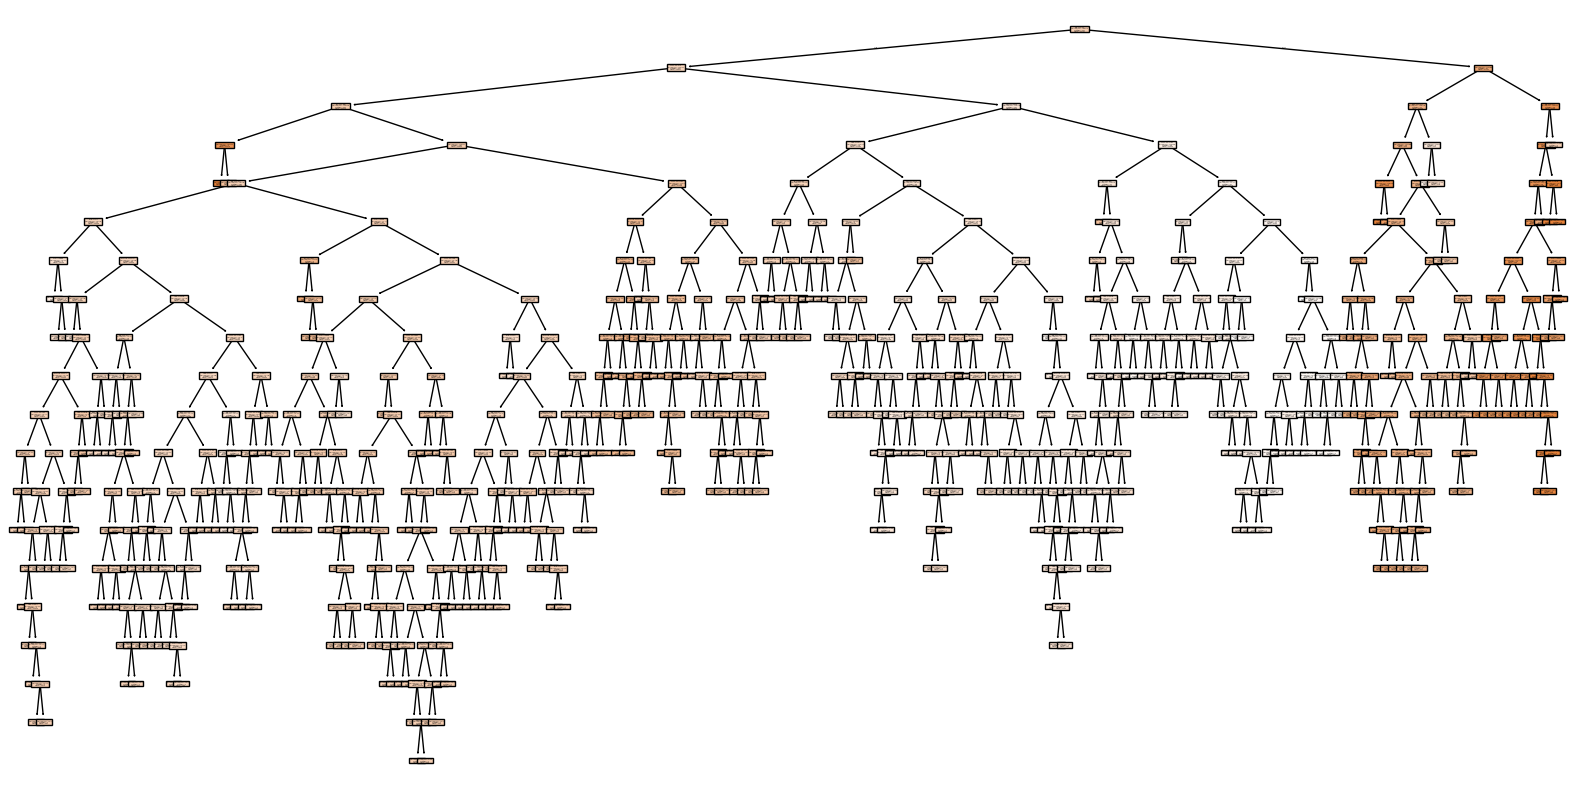

In [57]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(model,feature_names=X.columns,class_names=True,filled=True)
plt.show()


In [59]:
from sklearn.model_selection import GridSearchCV

# Define parameters for tuning
params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [61]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("R2 Score:", r2_score(y_test, y_test_pred))

Train MSE: 0.0
Test MSE: 10.416078431372549
R2 Score: 0.8579634380978161


In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 10.416078431372549
Mean Absolute Error (MAE): 2.394117647058824
R2 Score: 0.8579634380978161


In [67]:
print(y.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


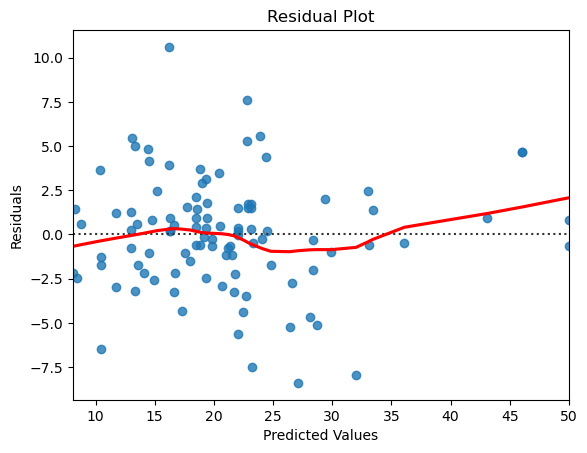

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = y_test - y_pred

# Plot
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

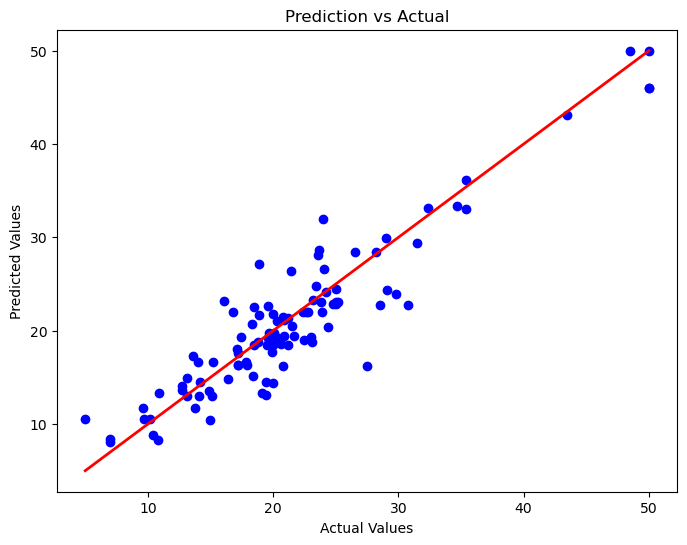

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Prediction vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

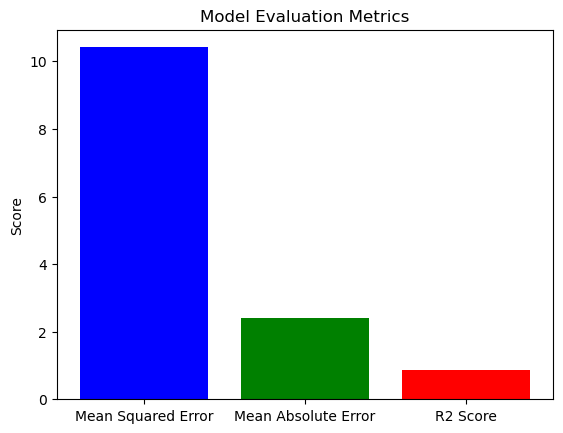

In [73]:
metrics = {
    'Mean Squared Error': mean_squared_error(y_test, y_pred),
    'Mean Absolute Error': mean_absolute_error(y_test, y_pred),
    'R2 Score': r2_score(y_test, y_pred)
}

plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()